In [1]:
import pprint

In [2]:
import requests

In [3]:
import os

In [4]:
from urllib.request import urlopen

In [10]:
# -*- coding: utf-8 -*-
"""
Batch download all the pinned pictures in your Pinterest board to a local folder.
Be noted: you have to keep your internet browser signed in your Pinterest account first.
Please contact me @ alfred.hui.wong@gmail.com if any question
@author: awang
"""
URL_PinterestBoard=input("Please enter your Pinterest board url starting with Http:// ")

from tkinter import filedialog
Folder_saved=filedialog.askdirectory(title="Select a local folder where you want to put all the pinned pictures")

from lxml import html
import requests

page=requests.get(URL_PinterestBoard)
tree=html.fromstring(page.content)

pins=tree.xpath('//div[@class="pinHolder"]//@href')

del page, tree

import requests, bs4
import urllib

n=1
for singlePin in pins:
    page=requests.get('http://www.pinterest.com'+singlePin)
    page_soup=bs4.BeautifulSoup(page.text,"lxml")
    page_element=page_soup.select('img[src]')
    image_address=page_element[0].attrs['src']

    resource=urllib.request.urlopen(image_address)
    output=open(Folder_saved+"/"+"Image"+str(n)+".jpg","wb")
    output.write(resource.read())
    output.close()

    n=n+1


Please enter your Pinterest board url starting with Http:// https://in.pinterest.com/sarfarazit08/urdu-literature/


In [8]:
accessToken = "4956216647166735778"
boardId = "241716773689533639"
folderPath = "./pins/"

response = requests.get(
    'https://api.pinterest.com/v3/boards/'+boardId+'/pins/',
    params={'access_token':accessToken,
            'fields':'pin.images[750x],pin.description,pin.image_signature',
            'page_size':100
            })

print(response)

if(os.path.isdir(folderPath) == False):
    os.makedirs(folderPath)

imageDatas = response.json()['data']
for imageData in imageDatas:
    pprint.pprint(imageData)
    imageUrl = imageData['images']['750x']['url']
    imageDesc = imageData['description']
    imageSig = imageData['image_signature']

    extensions = imageUrl.split('.')
    extension = extensions[len(extensions)-1]

    f = open(folderPath+"/"+imageSig+"."+extension,'wb')
    f.write(urlopen(imageUrl).read())
    f.close()

<Response [401]>


TypeError: 'NoneType' object is not iterable

In [15]:
import os

def file_merge(folder_path, output_file_name):
    
    fileList = [file for file in os.listdir(folder_path) if (file.endswith(".R"))]
    #print(fileList)
    try:
        for file in fileList:
            with open(os.path.join(folder_path,file)) as f:
                with open(output_file_name, "a") as f1:
                    f1.write('\n***'+str(file)+'***\n')
                    for line in f:
                        f1.write(line)
        print("File writing completed.")
    except Exception as e:
        print("Error: File writing failed. {}".format(e.args))
        
folder_path = r'D:\Video Tutorials\RRRRRRRR\Lynda.com - R Statistics Essential Training\Exercise\Finished Versions\Ch01' #os.path.join(os.getcwd())
output_file_name = os.path.join(folder_path,"MergedCodes.txt")

file_merge(folder_path, output_file_name)

File writing completed.


In [ ]:
import os

def file_merge(folder_path, output_file_name):
    
    fileList = [file for file in os.listdir(folder_path) if (file.endswith(".py")||file.endswith(".PY"))]
    #print(fileList)
    try:
        for file in fileList:
            with open(os.path.join(folder_path,file)) as f:
                with open(output_file_name, "a") as f1:
                    f1.write('\n***'+os.path.join(folder_path,file)+'***\n')
                    f1.write('\n***'+str(file)+'***\n')
                    for line in f:
                        f1.write(line)
        print("File writing completed.")
    except Exception as e:
        print("Error: File writing failed. {}".format(e.args))
directory = r''       
folder_paths =  [x[0] for x in os.walk(directory)] 
for folder_paths in folder_paths: #os.path.join(os.getcwd())    
    output_file_name = os.path.join(folder_path,"MergedCodes.txt")
    file_merge(folder_path, output_file_name)

In [6]:
import os
from fnmatch import fnmatch

root = r'C:\Users\Sarfaraz\Miscellaneous\Exercise Files'
pattern = "*.py"
fileList = list()

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            fileList.append( (os.path.join(path, name)))
            
try:
    for file in fileList:
        with open(file) as f:
            with open("merged_codes.md", "a") as f1:
                #f1.write('\n***'+file+'***\n')
                f1.write('\n***'+str(file)+'***\n')
                for line in f:
                    f1.write(line)
    print("File writing completed.")
except Exception as e:
    print("Error: File writing failed. {}".format(e.args))

File writing completed.


### Reddit Data Analysis in Python

In [8]:
# Python Reddit API Wrapper (PRAW)

# Install PRAW  - `pip install PRAW`

import praw

reddit = praw.Reddit (client_id ='GIlG18M9DY594Q' , 
    client_secret = 'Omuwd-2EbgNS_jy0t_o6iZrSr7E' , 
    username = 'sarfarazit08' ,
    password = 'I$h@lls33' ,
    user_agent = 'PyReddit' ) 

sub_reddit = reddit.subreddit('python') 
hot_python = sub_reddit.hot()

'''
# Write code to create a hierachical tree of commnts


# End
'''

for sub in hot_python:
    if not sub.stickied:
        print('Title : {}'.format(sub.title))
        print('\t Ups : {}'.format(sub.ups))
        print('\t Downs : {}'.format(sub.downs))
        print('\t Visited : {}'.format( sub.visisted))

        comments = sub.comments.replace_more(limit=0) 

        for comment in comments.list ():
            print ('Comments : ')
            print (20 * '-')
            print('\t\t Parent ID: ' , comment.parent())
            print('\t\t Comment ID: ', comment.id) 
            print('\t\t Comment: ', comment.body)


for comment in sub_reddit.stream.comments() : 
    try : 
        parent_id = str (comment.parent()) 
        original = reddit.comment (parent_id) 
        print('Parent : ')
        print(original.body) 
        print('Reply: ')
        print(comment.body) 
    except praw.exception as e:
        pass 

# Subscribe reddit
sub_reddit.subscribe()

In [ ]:
#work file for 0203

grade = 99
if grade >= 90:
    letterGrade = 'A'
elif grade >= 80:
    letterGrade = 'B'
elif grade >= 70:
    letterGrade = 'C'
elif grade >= 60:
    letterGrade = 'D'
else:
    letterGrade = 'F'
print(letterGrade)



In [ ]:
#number = 1
#while number < 11:
#   print(number)
#   number += 1

In [ ]:
# balance = 1000
# rate = 1.02
# years = 0
# while balance < 5000:
#    balance *= rate
#    years += 1
# print("It takes " + str(years) + " years to reach $5000.")

In [ ]:
# for i in [1,2,3,4,5,6,7,8,9,10]:
#   print(i)

In [ ]:
#for name in ["Jane", "John", "Matt", "George"]:
#   print(name)

In [ ]:
for i in range(1,11):
       print(i)

In [ ]:
sum = 0
numbers = range(1,11)
for i in numbers:
   sum += i
print(sum)

--------------------------------0207 function.py------------------------------------

def square(num):
   return num * num

def convertTemp(temp, scale):
   if scale == "c":
      return (temp - 32.0) * (5.0/9.0)
   elif scale == "f":
      return temp * 9.0/5.0 + 32

def onePerLine(str):
   for i in str:
      print(i)



# number = 12
# print(square(number))

# temp = int(input("Enter a temperature: "))
# scale = input("Enter the scale to convert to: ")
# converted = convertTemp(temp, scale)
# print("The converted temp is: " + str(converted))

word = input("Enter a word: ")
onePerLine(word)

--------------------------------0303 person.py------------------------------------

class Person:
   def __init__(self, first, middle, last, age):
      self.first = first;
      self.middle = middle;
      self.last = last;
      self.age = age;

   def __str__(self):
      return self.first + ' ' + self.middle + ' ' + self.last + \
        ' ' + str(self.age)

   def initials(self):
      return self.first[0] + self.middle[0] + self.last[0]

   def changeAge(self, amount):
      self.age += amount

aPerson = Person('Jane', 'Q', 'Public', 27)
print(aPerson)
aPerson.changeAge(2)
print(aPerson)
print(aPerson.initials())

--------------------------------0304 shapes.py------------------------------------

class Shape:
   def __init__(self, xcor, ycor):
      self.x = xcor
      self.y = ycor

   def __str__(self):
      return 'x: ' + str(self.x) + ' y: ' + str(self.y)

   def move(self, x1, y1):
      self.x = self.x + x1
      self.y = self.y + y1

class Rectangle(Shape):
   def __init__(self, xcor, ycor, width, height):
      Shape.__init__(self, xcor, ycor)
      self.width = width
      self.height = height

   def __str__(self):
      retStr = Shape.__str__(self)
      retStr += ' width: ' + str(self.width) + ' height: ' + \
         str(self.height)
      return retStr

rec = Rectangle(5,10,8,9)
print(rec)
rec.move(10,12)
print(rec)

--------------------------------0305 modules.py------------------------------------

# from tempconv import ctof
# from tempconv import ftoc

# temp = 212
# convTemp = ftoc(temp)
# print("the converted temp is " + str(convTemp))
# temp = 0
# convTemp = ctof(temp)
# print("the converted temp is " + str(convTemp))

from shapes import Shape
from shapes import Rectangle

s1 = Shape(4,8)
print(s1)
r1 = Rectangle(5,10,6,8)
print(r1)

--------------------------------0403-dbcreate.py------------------------------------

import sqlite3 as db

conn = db.connect('test.db')
cursor = conn.cursor()
cursor.execute("create table films(title text, year text, director text)")
print("table created")

--------------------------------0404 dbinsert.py------------------------------------

import sqlite3 as db

conn = db.connect('test.db')
cursor = conn.cursor()
cursor.execute('insert into films values("Annie Hall","1977","Woody Allen")')
cursor.execute('insert into films values("The Godfather","1972","Francis Ford Coppola")')
conn.close()

--------------------------------0405 dbquery.py------------------------------------

import sqlite3 as db

conn = db.connect('test.db')
conn.row_factory = db.Row
cursor = conn.cursor()

cursor.execute("select * from films")
rows = cursor.fetchall()
for row in rows:
   print("%s %s %s" % (row["title"], row["year"], row["director"]))
conn.close()

--------------------------------0406 temps.py------------------------------------

import sqlite3 as db

conn = db.connect('test.db')
cursor = conn.cursor()
cursor.execute("drop table if exists temps")
cursor.execute("create table temps(date text, temp int)")
cursor.execute('insert into temps values("12/1/2011",35)')
cursor.execute('insert into temps values("12/2/2011",42)')
cursor.execute('insert into temps values("12/3/2011",38)')
cursor.execute('insert into temps values("12/4/2011",41)')
cursor.execute('insert into temps values("12/5/2011",40)')
cursor.execute('insert into temps values("12/6/2011",28)')
cursor.execute('insert into temps values("12/7/2011",45)')
conn.row_factory = db.Row
cursor.execute("select * from temps")
rows = cursor.fetchall()
for row in rows:
   print("%s %s" % (row[0], row[1]))
cursor.execute("select avg(temp) from temps")
row = cursor.fetchone()
print("The average temperature for the week was %s" % row[0])
cursor.execute("delete from temps where temp = 40")
cursor.execute("select * from temps")
rows = cursor.fetchall()
for row in rows:
   print("%s %s" % (row[0], row[1]))

--------------------------------0501 getdir.py------------------------------------

import ftplib

connect = ftplib.FTP("www.ualr.edu")
connect.login("facstaff\mmmcmillan", "meredith26")
data = []
connect.dir(data.append)
connect.quit()
for line in data:
   print(line)

--------------------------------0502- sendmail.py------------------------------------

import smtplib
from email.MIMEMultipart import MIMEMultipart
from email.MIMEText import MIMEText

fromaddr = 'sarfarazit08@gmail.com'
toaddr = 'sarfarazit08@gmail.com'
text = 'test message sent from Python'
username = 'sarfarazit08'
password = '>Y0@2fm!1<'
msg = MIMEMultipart()
msg['From'] = fromaddr
msg['To'] = toaddr
msg['Subject'] = 'PYTHONTest'
msg.attach(MIMEText(text))
server = smtplib.SMTP('smtp.gmail.com:587')
server.ehlo()
server.starttls()
server.ehlo()
server.login(username, password)
server.sendmail(fromaddr, toaddr, msg.as_string())
server.quit()


--------------------------------0503 readmail.py------------------------------------

import imaplib

mailserver = imaplib.IMAP4_SSL('imap.gmail.com', 993)
username = 'mcmillanadmin'
password = 'meredith1'
mailserver.login(username, password)

status, count = mailserver.select('Inbox')
status, data = mailserver.fetch(count[0], '(UID BODY[TEXT])')

print data[0][1]

mailserver.close()
mailserver.logout()

--------------------------------0504 newsreader.py------------------------------------

from nntplib import *
s = NNTP('sarfarazit.wordpress.com')
(resp, count, first, last, name) = s.group('comp.lang.python')
(resp, subs) = s.xhdr('subject', (str(first)+'-'+str(last)))
for subject in subs[-10:]:
   print(subject)
number = input('Which article do you want to read? ')
(reply, num, id, list) = s.body(str(number))
for line in list:
   print(line)

--------------------------------0603 plaintext.py------------------------------------

import htmllib, urllib, formatter, sys

website = urllib.urlopen("http://www.sarfarazit.wordpress.com")
data = website.read()
website.close()
format = formatter.AbstractFormatter(formatter.DumbWriter(sys.stdout))
ptext = htmllib.HTMLParser(format)
ptext.feed(data)
ptext.close()

--------------------------------0604 getlinks.py------------------------------------

import urllib, htmllib, formatter

website = urllib.urlopen("http://www.profmcmillan.com")
data = website.read()
website.close()
format = formatter.AbstractFormatter(formatter.NullWriter())
ptext = htmllib.HTMLParser(format)
ptext.feed(data)
for link in ptext.anchorlist:
   print(link)

--------------------------------0605 getquote.py------------------------------------

import urllib, re, sys

symbol = sys.argv[1]
url = 'http://finance.google.com/finance?q='
content = urllib.urlopen(url+symbol).read()
m = re.search('span id="ref.*>(.*)<', content)
if m:
   quote = m.group(1)
else:
   quote = 'no quote for symbol: ' + symbol
print(quote)

--------------------------------0606 crawl.py------------------------------------

import urllib, htmllib, formatter, re, sys

url = sys.argv[1]
website = urllib.urlopen("http://"+url)
data = website.read()
website.close()
format = formatter.AbstractFormatter(formatter.NullWriter())
ptext = htmllib.HTMLParser(format)
ptext.feed(data)
links = []
links = ptext.anchorlist
for link in links:
   if re.search('http', link) != None:
      print(link)
      website = urllib.urlopen(link)
      data = website.read()
      website.close()
      ptext = htmllib.HTMLParser(format)
      ptext.feed(data)
      morelinks = ptext.anchorlist
      for alink in morelinks:
         if re.search('http', alink) != None:
            links.append(alink)

--------------------------------0702 webserver.py------------------------------------

import sys
import BaseHTTPServer
from SimpleHTTPServer import SimpleHTTPRequestHandler

Handler = SimpleHTTPRequestHandler
Server = BaseHTTPServer.HTTPServer
Protocol = "HTTP/1.0"

if sys.argv[1:]:
   port = int(sys.argv[1])
else:
   port = 8000

server_address = ('127.0.0.1', port)

Handler.protocol_version = Protocol
httpd = Server(server_address, Handler)

print("Serving HTTP")
httpd.serve_forever()

--------------------------------0703 hellocgi.py------------------------------------

import sys
sys.stdout.write("Content-type: text/html \r\n\r\n")
sys.stdout.write("<!doctype html><html><head><title>Hello CGI</title></head>")
sys.stdout.write("<body><h2>Hello CGI</h2></body></html>")

--------------------------------0704 querys.py------------------------------------

import cgi, os, sys

sys.stdout.write("Content-type: text.html\r\n\r\n")
sys.stdout.write("")
sys.stdout.write("<html><body>")
sys.stdout.write("<h2>Query String</h2>")

form = cgi.FieldStorage()
for field in form.keys():
   sys.stdout.write("%s -> %s<br />" % (field, form[field].value))
sys.stdout.write("</body></html>")

--------------------------------0705 tempconv.py------------------------------------

import cgi, os, sys

sys.stdout.write("Content-type: text/html\r\n\r\n")
sys.stdout.write("")
sys.stdout.write("<html><body>")
sys.stdout.write("<h2>Fahrenheit converted to Celsius</h2>")

form = cgi.FieldStorage()
fahr = float(form["temp"].value)
celsius = 5.0 * (fahr - 32.0) / 9.0
sys.stdout.write("%.1f Fahrenheit equals %.1f Celsius" % (fahr, celsius))
sys.stdout.write("</body></html>")

--------------------------------0801 dispfilms.py------------------------------------

import cgi, os, sys
import sqlite3 as db

conn = db.connect('test.db')
cursor = conn.cursor()
conn.row_factory = db.Row
cursor.execute("select * from films")
rows = cursor.fetchall()

sys.stdout.write("Content-type: text.html\r\n\r\n")
sys.stdout.write("")
sys.stdout.write("<html><body><p>")
for row in rows:
   sys.stdout.write("%s %s %s" % (row[0],row[1],row[2]))
   sys.stdout.write("<br />")
sys.stdout.write("</p></body></html>")

--------------------------------0802 filmform.py------------------------------------

import cgi, os, sys
import sqlite3 as db

conn = db.connect('test.db')
cursor = conn.cursor()
conn.row_factory = db.Row
cursor.execute("select * from films")
rows = cursor.fetchall()

sys.stdout.write("Content-type: text/html\r\n\r\n")
sys.stdout.write("")
sys.stdout.write("<html><body>")

for row in rows:
    sys.stdout.write("<p>Title:&nbsp;%s<br />" % (row[0]))
    sys.stdout.write("Year:&nbsp;%s<br />" % (row[1]))
    sys.stdout.write("Director:&nbsp;%s<br />" % (row[2]))
    sys.stdout.write("</p>")
sys.stdout.write("</body></html>")


--------------------------------0803 addfilms.py------------------------------------

import cgi, sys, os
import sqlite3 as db

conn = db.connect('test.db')
cursor = conn.cursor()
formdata = cgi.FieldStorage()
title = formdata["title"].value
year = formdata["year"].value
director = formdata["director"].value
rowdata = (title, year, director)
cursor.execute('insert into films values(?, ?, ?)', rowdata)
conn.row_factory = db.Row
cursor.execute("select * from films")
rows = cursor.fetchall()

sys.stdout.write("Content-type: text/html\r\n\r\n")
sys.stdout.write("")
sys.stdout.write("<html><body><h1>Films</h1><p>")
for row in rows:
   sys.stdout.write("%s %s %s" % (row[0], row[1], row[2]))
   sys.stdout.write("<br />")
sys.stdout.write("</p></body></html>")

--------------------------------0804 filmupdate.py------------------------------------

import cgi, os, sys
import sqlite3 as db

conn = db.connect('test.db')
conn.row_factory = db.Row
cursor = conn.cursor()
filmdata = cgi.FieldStorage()
title = filmdata["title"].value
year = filmdata["year"].value
director = filmdata["director"].value
cursor.execute("update films set year = ? where title = ?", (year,title))
conn.row_factory = db.Row
cursor.execute("select * from films")
rows = cursor.fetchall()

sys.stdout.write("Content-type: text/html\r\n\r\n")
sys.stdout.write("")
sys.stdout.write("<html><body><h1>Films</h1><p>")
for row in rows:
   sys.stdout.write("%s %s %s" % (row[0], row[1], row[2]))
   sys.stdout.write("<br />")
sys.stdout.write("</p></body></html>")

--------------------------------0901 writexml.py------------------------------------

from xml.dom.minidom import Document
doc = Document()
films = doc.createElement("films")
doc.appendChild(films)
afilm = doc.createElement("film")
films.appendChild(afilm)
title = doc.createElement("title")
afilm.appendChild(title)
text = doc.createTextNode("Annie Hall")
title.appendChild(text)
director = doc.createElement("director")
afilm.appendChild(director)
text = doc.createTextNode("Woody Allen")
director.appendChild(text)
year = doc.createElement("year")
afilm.appendChild(year)
text = doc.createTextNode("1977")
year.appendChild(text)
filename = "films.xml"
f = open(filename, "w")
f.write(doc.toprettyxml(indent="   "))
f.close()

--------------------------------0902 parseXML.py------------------------------------

import xml.sax

class FilmParser(xml.sax.ContentHandler):
   def __init__(self):
      xml.sax.ContentHandler.__init__(self)

   def startElement(self, name, attrs):
      print("start element: '" + name + " ' ")

--------------------------------0903 findElement.py------------------------------------

from xml.sax import make_parser
from xml.sax.handler import ContentHandler
import string, sys

def trim(text):
   return ' '.join(text.split())

class FindContent(ContentHandler):

   def __init__(self, name):
      self.toFind = name
      self.inElement = 0
      self.found = ""

   def startElement(self, name, attrs):
      self.found = ""
      if name == self.toFind:
         self.inElement = 1
      else:
         self.inElement = 0

   def characters(self, ch):
      if self.inElement:
         self.found = self.found + ch

   def endElement(self, name):
      if name == self.toFind:
         print(trim(self.found))

def find_elements(name):
   handler = FindContent(name)
   parser = make_parser()
   parser.setContentHandler(handler)
   parser.parse(open('films.xml'))

if __name__ == "__main__":
   name = sys.argv[1]
   find_elements(name)

--------------------------------1002 manage.py------------------------------------

#!/usr/bin/env python
from django.core.management import execute_manager
import imp
try:
    imp.find_module('settings') # Assumed to be in the same directory.
except ImportError:
    import sys
    sys.stderr.write("Error: Can't find the file 'settings.py' in the directory containing %r. It appears you've customized things.\nYou'll have to run django-admin.py, passing it your settings module.\n" % __file__)
    sys.exit(1)

import settings

if __name__ == "__main__":
    execute_manager(settings)


--------------------------------1003 - 1004 models.py------------------------------------

from django.db import models

class Films(models.Model):
   title = models.CharField(max_length=100)
   year = models.CharField(max_length=4)
   director = models.CharField(max_length=100)

   def __unicode__(self):
      return self.title + "," + self.year + "," + self.director


--------------------------------1005 - 1006 urls.py------------------------------------

from django.conf.urls.defaults import patterns, include, url

# Uncomment the next two lines to enable the admin:
from django.contrib import admin
admin.autodiscover()

urlpatterns = patterns('',
    url(r'^films/$', 'films.views.index'),
    url(r'^films/add', 'films.views.add'),
    # Examples:
    # url(r'^$', 'mysite.views.home', name='home'),
    # url(r'^mysite/', include('mysite.foo.urls')),

    # Uncomment the admin/doc line below to enable admin documentation:
    # url(r'^admin/doc/', include('django.contrib.admindocs.urls')),

    # Uncomment the next line to enable the admin:
    url(r'^admin/', include(admin.site.urls)),
)


--------------------------------1005 admin.py------------------------------------

from films.models import Films
from django.contrib import admin

admin.site.register(Films)

--------------------------------1006 1007 views.py------------------------------------

from django.http import HttpResponse
from films.models import Films
from django.template import Context, loader, RequestContext
from mysite.films.forms import AddForm
from django.shortcuts import render_to_response
import sqlite3 as db

def index(request):
   film_list = Films.objects.all()
   t = loader.get_template('films/index.html')
   c = Context({'film_list': film_list})
   return HttpResponse(t.render(c))

def add(request):
   form = AddForm(request.POST)
   write_to_database(request.POST)

   return render_to_response('add.html', {
      'form': form}, context_instance=
      RequestContext(request))



--------------------------------1007 settings.py------------------------------------

# Django settings for mysite project.

DEBUG = True
TEMPLATE_DEBUG = DEBUG

ADMINS = (
    # ('Your Name', 'your_email@example.com'),
)

MANAGERS = ADMINS

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3', # Add 'postgresql_psycopg2', 'postgresql', 'mysql', 'sqlite3' or 'oracle'.
        'NAME': 'c:/project/mysite/test.db',                      # Or path to database file if using sqlite3.
        'USER': '',                      # Not used with sqlite3.
        'PASSWORD': '',                  # Not used with sqlite3.
        'HOST': '',                      # Set to empty string for localhost. Not used with sqlite3.
        'PORT': '',                      # Set to empty string for default. Not used with sqlite3.
    }
}

# Local time zone for this installation. Choices can be found here:
# http://en.wikipedia.org/wiki/List_of_tz_zones_by_name
# although not all choices may be available on all operating systems.
# On Unix systems, a value of None will cause Django to use the same
# timezone as the operating system.
# If running in a Windows environment this must be set to the same as your
# system time zone.
TIME_ZONE = 'America/Chicago'

# Language code for this installation. All choices can be found here:
# http://www.i18nguy.com/unicode/language-identifiers.html
LANGUAGE_CODE = 'en-us'

SITE_ID = 1

# If you set this to False, Django will make some optimizations so as not
# to load the internationalization machinery.
USE_I18N = True

# If you set this to False, Django will not format dates, numbers and
# calendars according to the current locale
USE_L10N = True

# Absolute filesystem path to the directory that will hold user-uploaded files.
# Example: "/home/media/media.lawrence.com/media/"
MEDIA_ROOT = ''

# URL that handles the media served from MEDIA_ROOT. Make sure to use a
# trailing slash.
# Examples: "http://media.lawrence.com/media/", "http://example.com/media/"
MEDIA_URL = ''

# Absolute path to the directory static files should be collected to.
# Don't put anything in this directory yourself; store your static files
# in apps' "static/" subdirectories and in STATICFILES_DIRS.
# Example: "/home/media/media.lawrence.com/static/"
STATIC_ROOT = ''

# URL prefix for static files.
# Example: "http://media.lawrence.com/static/"
STATIC_URL = '/static/'

# URL prefix for admin static files -- CSS, JavaScript and images.
# Make sure to use a trailing slash.
# Examples: "http://foo.com/static/admin/", "/static/admin/".
ADMIN_MEDIA_PREFIX = '/static/admin/'

# Additional locations of static files
STATICFILES_DIRS = (
    # Put strings here, like "/home/html/static" or "C:/www/django/static".
    # Always use forward slashes, even on Windows.
    # Don't forget to use absolute paths, not relative paths.
)

# List of finder classes that know how to find static files in
# various locations.
STATICFILES_FINDERS = (
    'django.contrib.staticfiles.finders.FileSystemFinder',
    'django.contrib.staticfiles.finders.AppDirectoriesFinder',
#    'django.contrib.staticfiles.finders.DefaultStorageFinder',
)

# Make this unique, and don't share it with anybody.
SECRET_KEY = 'p79c8#ejn&e$iz2uq(+=gw%i!c_6c67u=%1jj8x=(hyp$5!jic'

# List of callables that know how to import templates from various sources.
TEMPLATE_LOADERS = (
    'django.template.loaders.filesystem.Loader',
    'django.template.loaders.app_directories.Loader',
#     'django.template.loaders.eggs.Loader',
)

MIDDLEWARE_CLASSES = (
    'django.middleware.common.CommonMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
)

ROOT_URLCONF = 'mysite.urls'

TEMPLATE_DIRS = (
    "c:/templates"
    # Put strings here, like "/home/html/django_templates" or "C:/www/django/templates".
    # Always use forward slashes, even on Windows.
    # Don't forget to use absolute paths, not relative paths.
)

INSTALLED_APPS = (
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.sites',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'films',
    # Uncomment the next line to enable the admin:
    'django.contrib.admin',
    # Uncomment the next line to enable admin documentation:
    # 'django.contrib.admindocs',
)

# A sample logging configuration. The only tangible logging
# performed by this configuration is to send an email to
# the site admins on every HTTP 500 error.
# See http://docs.djangoproject.com/en/dev/topics/logging for
# more details on how to customize your logging configuration.
LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'handlers': {
        'mail_admins': {
            'level': 'ERROR',
            'class': 'django.utils.log.AdminEmailHandler'
        }
    },
    'loggers': {
        'django.request': {
            'handlers': ['mail_admins'],
            'level': 'ERROR',
            'propagate': True,
        },
    }
}


--------------------------------arithmetic.py------------------------------------

def add(n1,n2):
	n3 = n1 + n2
	print ("Sum of",n1, "and", n2,"=", n3)
	
def sub(n1,n2):
	n3 = n1 - n2
	print ("Difference of",n1, "and", n2,"=", n3)

def mul(n1,n2):
	n3 = n1 * n2
	print ("Product of",n1, "and", n2,"=", n3)

def div(n1,n2):
	n3 = n1 / n2
	print ("Division of",n1, "and", n2,"=", n3)
	
def quotient(n1,n2):
	n3 = n1 // n2
	print ("Quotient of",n1, "and", n2,"=", n3)
	
def reminder(n1,n2):
	n3 = n1 % n2
	print ("Reminder of",n1, "and", n2,"=", n3)


--------------------------------Assignment_2_2.py------------------------------------

name = raw_input("What is your name? ")
print ("Hello! " + name)

--------------------------------dbInsert.py------------------------------------

#SQLITE - Inserting records in database

import sqlite3 as db

conn = db.connect('Database.db')
cursor = conn.cursor()
cursor.execute('insert into films values("Film", "Year","Director")')
print('Table created!')


--------------------------------dbSelect.py------------------------------------

#SQLITE - Fetching records from database

import sqlite3 as db

conn = db.connect('Database.db')
conn.row_factory = db.Row
cursor = conn.cursor()

cursor.execute("Select * from films")
rows = cursor.fetchall()

for row in rows:
    print("%s %s %s" % (row["title"], row["year"], row["director"]))
conn.close()


--------------------------------email.py------------------------------------

import smtplib, imaplib, os
from email.MIMEMultipart import MIMEMultipart
from email.MIMEText import MIMEText

def read():
   os.system("cls")
   mailserver = imaplib.IMAP4_SSL('imap.gmail.com', 993)
   username = 'mcmillanadmin'
   password = 'meredith1'
   mailserver.login(username, password)
   status, count = mailserver.select('Inbox')
   status, data = mailserver.fetch(count[0], '(UID BODY[TEXT])')
   print data[0][1]
   mailserver.close()
   mailserver.logout()
   choice = raw_input("Press x to clear screen: ")
   if choice == "x":
      os.system("cls")

def send():
   fromaddr = raw_input("Enter your email address: ")
   toaddr = raw_input("Enter the receiver's email address: ")
   subject = raw_input("Enter the subject: ")
   text = raw_input("Enter the message: ")
   username = raw_input("Enter your user name: ")
   password = raw_input("Enter your password: ")
   msg = MIMEMultipart()
   msg['From'] = fromaddr
   msg['To'] = toaddr
   msg['Subject'] = subject
   msg.attach(MIMEText(text))
   server = smtplib.SMTP('smtp.gmail.com:587')
   server.ehlo()
   server.starttls()
   server.ehlo()
   server.login(username, password)
   server.sendmail(fromaddr, toaddr, msg.as_string())
   server.quit()
   choice = raw_input("Email sent. Press x to clear the screen: ")
   if choice == "x":
      os.system("cls")

while 1:
   os.system("cls")
   print("Email Program")
   print("")
   print("1. Read email")
   print("2. Send email")
   print("3. Exit")
   print("")
   choice = raw_input("Enter a choice: ")
   if choice == "1":
      read()
   elif choice == "2":
      send()
   elif choice == "3":
      break;




--------------------------------exceptionHandling.py------------------------------------

#Exception Handling

try: 
    number = int (input('Enter a number: '))
    print(number)
except ValueError:
    print('Not a number, please re-enter number!')
    number = int(input('Enter a number: '))
#print(number)

--------------------------------fib1.py------------------------------------

## Example 1: Using looping technique
def fib(n):
     a,b = 1,1
     for i in range(n-1):
         a = b
         b = a+b
         return a
n = input("Enter a number :")
print (fib(n))


--------------------------------fibbonacci.py------------------------------------

n = input("Enter a number : ")
n = int(n)
def fib(n):
    a,b = 1,1
    for i in range(n-1):
        a = i
        b = a+b
        return a
print (fib(n))

--------------------------------forms.py------------------------------------

from django import forms

class AddForm(forms.Form):
   title = forms.CharField(max_length=100)
   year = forms.CharField(max_length=4)
   director = forms.CharField(max_length=100)



--------------------------------List.py------------------------------------

#Lists

Items = ['Bread', 'Biscuit', 'Banana', 'Books']

for i in Items:
	print (i)
print (len(Items))
print(Items[0] + " " + Items[1])
print (sorted(Items))
Items.reverse()
print (Items)
Items.append('Brush')
print (Items)
Items.pop()
print (Items)
print (Items.index('Books'))
print (Items)

--------------------------------multipleException.py------------------------------------

#Multiple exceptions and priority of execution

try: 
    number = int (input('Enter a number: '))
    print(number)
    
    aFile = open('module.py')
        
except ValueError:
    print('Not a number, please re-enter number!')
    number = int(input('Enter a number: '))
    
except IOError:
    print ('Can''t open the file!')

print('Finished')

--------------------------------Mygame.py------------------------------------

import pygame
import sys

pygame.init()
bgcolor = (200,200,100)
surf = pygame.display.set_mode((400,400))

circle_color = (0,255,255)
x,y = 200, 300
circle_rad = 50

pygame.display.set_caption("Game window")

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            sys.exit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                y -= 10
            elif event.key == pygame.K_DOWN:
                y += 10
            elif event.key == pygame.K_RIGHT:
                x += 10
            elif event.key == pygame.K_LEFT:
                x -= 10
                
    circle_pos = (x,y)
    
    surf.fill(bgcolor)
    pygame.draw.circle(surf, circle_color, circle_pos, circle_rad)
    
    pygame.display.flip()
    
            
            

--------------------------------OOPsInheritance.py------------------------------------

#OOPsInheritance

class Shape:
	def __init__(self, xcor, ycor):
		self.x = xcor
		self.y = ycor
	
	def __str__(self):
		return 'x: ' + str(self.x) + ' y: ' + str(self.y)
	
	def move(self, x1, y1):
		self.x = self.x + x1
		self.y = self.y + y1

#'Rectangle' class inherits 'Shape' class
class Rectangle(Shape): 
	def __init__(self, xcor, ycor, width, height):
		Shape.__init__(self, xcor, ycor)
		self.width = width
		self.height = height
	
	def __str__(self):
		retStr = Shape.__str__(self) #method inheritance
		retStr += '\n Rectangle Width : ' + str(self.width) + ' and Height : ' + str (self.height)
		
		return retStr
		
rec = Rectangle (5,5 , 13, 16)
print(rec)

rec.move(10,-12)
print(rec)


		
		
	
	

--------------------------------OOPsInPython.py------------------------------------

#OOPs in Python

class Employee:
	def __init__(self, firstName, middleName, lastName, empNo):
		self.firstName = firstName;
		self.middleName = middleName;
		self.lastName = lastName;
		self.empNo = empNo;
	
	def __str__(self):
		return self.firstName + ' ' + self.middleName + ' ' + self.lastName  + \
		' ' +str(self.empNo)
			
	def initials(self):
		return self.firstName[0]+ self.middleName[0]+ self.lastName[0]
	
	def replaceEmpNo(self, newEmpNo):
		self.empNo = newEmpNo
		
	def changeEmpNo(self, chgEmpNo):
		self.empNo += chgEmpNo
		
aEmployee = Employee('MD' , 'Sarfaraz', 'Alam', 633364)
bEmployee = Employee('Noah' , 'Gibran', 'Ahmed', 456454)
print(aEmployee)
print(bEmployee)
bEmployee.changeEmpNo(5)
aEmployee.replaceEmpNo(633365)
print(aEmployee, "\n" , bEmployee)
print(aEmployee.initials())


--------------------------------Palindrome.py------------------------------------

def isPalindrome(line):
    line = str(line)
    print (type(line), line)
    reverse = (line[::-1])
    print (type(reverse), reverse)
    
    if (reverse == line):
        print ('True')
    else: 
        print ('False')

line = input("Enter some text : ")
isPalindrome(line)
    
    

--------------------------------PE_06.py------------------------------------

# Difference of SquaresOfSum to SumOFSquares

import math

n = input()
 
def diff(n):
    for i in range(1,n+1):
        return (reduce(sum(n[i]**3 - n[i]))) 
 
print  (str(diff(n)))

--------------------------------plaintext.py------------------------------------

import htmllib, urllib, formatter, sys

website = urllib.urlopen("http://www.profmcmillan.com")
data = website.read()
website.close()
format = formatter.AbstractFormatter(formatter.DumbWriter(sys.stdout))
ptext = htmllib.HTMLParser(format)
ptext.feed(data)
ptext.close()

--------------------------------PrintAlineAtAtime.py------------------------------------

#Print one line at a time

def printEachLine():
	for i in line:
		print(i)
		
line = input("Enter a line/quote: " )
printEachLine()


--------------------------------Shape.py------------------------------------

#OOPsInheritance

class Shape:
	def __init__(self, xcor, ycor):
		self.x = xcor
		self.y = ycor
	
	def __str__(self):
		return 'x: ' + str(self.x) + ' y: ' + str(self.y)
	
	def move(self, x1, y1):
		self.x = self.x + x1
		self.y = self.y + y1

#'Rectangle' class inherits 'Shape' class
class Rectangle(Shape): 
	def __init__(self, xcor, ycor, width, height):
		Shape.__init__(self, xcor, ycor)
		self.width = width
		self.height = height
	
	def __str__(self):
		retStr = Shape.__str__(self) #method inheritance
		retStr += '\n Recatange Width : ' + str(self.width) + ' and Height : ' + str (self.height)
		
		return retStr
		
rec = Rectangle (5,5 , 13, 16)
print(rec)

rec.move(10,-12)
print(rec)


		
		
	
	

--------------------------------sqLite.py------------------------------------

#SQLITE - Creating a database connection
import sqlite3 as db

conn = db.connect('Database.db')
cursor = conn.cursor()
cursor.execute('create table films(title text, year text,director text)')
print('Table created!')

--------------------------------table.py------------------------------------

for a in range(1,11):
	raw_input()
	print("\n")	
	for b in range (1,11) :
		print a,"X",b,"=", a*b

--------------------------------tempconv.py------------------------------------

def ftoc(temp):
	return ((5.0/9.0)*(temp - 32.0))
def ctof(temp):
	return ((9.0/5.0)*(temp + 32.0))

--------------------------------tempconvModule.py------------------------------------

#creating modules in python

from tempconv import ftoc
from tempconv import ctof

temp = input("Enter Fahrenheit temperature reading : ")
convTemp = ftoc(int(temp))
print("The converted temperature is " + str(convTemp) + "C")

temp = input("Enter Celsius temperature reading : ")
convTemp = ctof(int(temp))
print("The converted temperature is " + str(convTemp) + "F")


--------------------------------tutorial examples.py------------------------------------

>>> 'sarfaraz'[2]
'r'
>>> 'sarfu'[-3]
'r'
>>> 'sarfu'[:]
'sarfu'
>>>  morons = [1,2,2,3,3,4,5,6]
SyntaxError: unexpected indent
>>> morons = [1,2,2,3,3,4,5,6]
>>> morons[:]
[1, 2, 2, 3, 3, 4, 5, 6]
>>> morons[3:1]
[]
>>> morons[1:3]
[2, 2]
>>> morons[0:]
[1, 2, 2, 3, 3, 4, 5, 6]
>>> morons[-1:]
[6]
>>> morons[:-1]
[1, 2, 2, 3, 3, 4, 5]
>>> morons[-1:]
[6]
>>> morons[-9:]
[1, 2, 2, 3, 3, 4, 5, 6]
>>> morons[-20:]
[1, 2, 2, 3, 3, 4, 5, 6]
>>> morons[:7]
[1, 2, 2, 3, 3, 4, 5]
>>> morons[:10]
[1, 2, 2, 3, 3, 4, 5, 6]
>>> morons[::]
[1, 2, 2, 3, 3, 4, 5, 6]
>>> morons[:2:]
[1, 2]
>>> morons[::2]
[1, 2, 3, 5]
>>> morons[::-2]
[6, 4, 3, 2]
>>> morons[::3]
[1, 3, 5]
>>> morons[::-3]
[6, 3, 2]
>>> morons[::-3] + morons[::3]
[6, 3, 2, 1, 3, 5]
>>> morons[::3] + morons[::5]
[1, 3, 5, 1, 4]
>>> 'sarfaraz' + ' sarfaraz'
'sarfaraz sarfaraz'
>>> 10*'sarfaraz'
'sarfarazsarfarazsarfarazsarfarazsarfarazsarfarazsarfarazsarfarazsarfarazsarfaraz'
>>> 10*10
100
>>> [1]*10
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
>>> 1 in morons
True
>>> morons
[1, 2, 2, 3, 3, 4, 5, 6]
>>> 2 in morons
True
>>> 7 in morons
False
>>> len(morons)
8
>>> max(morons)
6
>>> min(morons)
1
>>> list(morons)
[1, 2, 2, 3, 3, 4, 5, 6]
>>> list(sarfaraz)
Traceback (most recent call last):
  File "<pyshell#43>", line 1, in <module>
    list(sarfaraz)
NameError: name 'sarfaraz' is not defined
>>> list('sarfaraz')
['s', 'a', 'r', 'f', 'a', 'r', 'a', 'z']
>>> max('sarfaraz')
'z'
>>> min('sarfaraz')
'a'
>>> min(' sarfaraz ')
' '
>>> max(' sarfaraz ')
'z'
>>> max(' sarfaraz_')
'z'
>>> max(' sarfara@_')
's'
>>> max(' sarfara$_')
's'
>>> max(' sarfaraz@')
'z'
>>> max(' sarfaraz%')
'z'
>>> morons
[1, 2, 2, 3, 3, 4, 5, 6]
>>> morons [3] = -1
>>> morons
[1, 2, 2, -1, 3, 4, 5, 6]
>>> morons[-1] = 33
>>> morons
[1, 2, 2, -1, 3, 4, 5, 33]
>>> del morons[-1]
>>> morons
[1, 2, 2, -1, 3, 4, 5]
>>> morons[7] = 30
Traceback (most recent call last):
  File "<pyshell#66>", line 1, in <module>
    morons[7] = 30
IndexError: list assignment index out of range
>>> morons = morons[:] + 33
Traceback (most recent call last):
  File "<pyshell#67>", line 1, in <module>
    morons = morons[:] + 33
TypeError: can only concatenate list (not "int") to list
>>> morons = morons[:] + list(33)
Traceback (most recent call last):
  File "<pyshell#68>", line 1, in <module>
    morons = morons[:] + list(33)
TypeError: 'int' object is not iterable
>>> morons = morons[:] + morons[:]
>>> morons
[1, 2, 2, -1, 3, 4, 5, 1, 2, 2, -1, 3, 4, 5]
>>> del in morons
SyntaxError: invalid syntax
>>> del morons
>>> morons
Traceback (most recent call last):
  File "<pyshell#73>", line 1, in <module>
    morons
NameError: name 'morons' is not defined
>>> morons = [1, 2, 2, -1, 3, 4, 5, 1, 2, 2, -1, 3, 4, 5]
>>> morons
[1, 2, 2, -1, 3, 4, 5, 1, 2, 2, -1, 3, 4, 5]
>>> aah = list('Fuck me')
>>> aah
['F', 'u', 'c', 'k', ' ', 'm', 'e']
>>> aah[4:] = list('you')
>>> aah
['F', 'u', 'c', 'k', 'y', 'o', 'u']
>>> aah[:] = 'mother fucker'
>>> aah
['m', 'o', 't', 'h', 'e', 'r', ' ', 'f', 'u', 'c', 'k', 'e', 'r']
>>> aah[:] = []
>>> aah
[]
>>> morons = [12, 12.5, -12, -12i]
SyntaxError: invalid syntax
>>> morons = [12, 12.5, -12, -12, 12, 13, 0 ,12]
>>> morons.count(12)
3
>>> morons.count(12.5)
1
>>> morons.count(0)
1
>>> morons.count()
Traceback (most recent call last):
  File "<pyshell#90>", line 1, in <module>
    morons.count()
TypeError: count() takes exactly one argument (0 given)
>>> morons.count(=)
SyntaxError: invalid syntax
>>> morons = list('sarfaraz')
>>> morons
['s', 'a', 'r', 'f', 'a', 'r', 'a', 'z']
>>> morons.count(a)
Traceback (most recent call last):
  File "<pyshell#94>", line 1, in <module>
    morons.count(a)
NameError: name 'a' is not defined
>>> morons.count('a')
3
>>> morons.count('r')
2
>>> boy = 'sarfaraz'
>>> girl = 'sunaina'
>>> me = list(boy)
>>> me
['s', 'a', 'r', 'f', 'a', 'r', 'a', 'z']
>>> you = list(girl)
>>> you
['s', 'u', 'n', 'a', 'i', 'n', 'a']
>>> me.extend(you)
>>> me
['s', 'a', 'r', 'f', 'a', 'r', 'a', 'z', 's', 'u', 'n', 'a', 'i', 'n', 'a']
>>> boy.extend(girl)
Traceback (most recent call last):
  File "<pyshell#108>", line 1, in <module>
    boy.extend(girl)
AttributeError: 'str' object has no attribute 'extend'
>>> me.index('a')
1

Author Information:
* Name: [THE LITTLE MERMAID](http://www.storyteller.net/stories/text/9) by Gianni Rodari
* Website: http://www.storyteller.net/tellers/
* All stories are under the copyright of the author. Do not use without written permission. 
* Translation copyright 2001 by Bernie Libster

In [25]:
text = """
THE LITTLE MERMAID
by Gianni Rodari
In the city of Palermo, on the island of Sicily, there lived a poor fisherman.

He was so poor, he didn’t even own a boat. Every day he carried his net down to the sea, tossed it into the water and pulled it up at the end of the day.

One day when he pulled in the net he saw something sparkling. At first he thought it was a doll. But he looked closer, he saw that it was a little mermaid, only two or three feet long.
At first he was frightened and wanted to throw her back in the water. He was a superstitious man, like many of the poor people of Palermo. But as he was trying to decide what to do, he heard a little voice.

“Please, please don’t throw me back.”’

The voice was coming from the mermaid.

It was so small and sad that he looked closer. She was a pretty little creature with long blond hair and the bluest eyes he had ever seen. Just like the color of the ocean.

“What,” he said, very surprised, “But you live in the sea.”

“Please, please” she said again, “I’m lost. I’ll never find my way back home. Please take me home with you.”

Now the fisherman was confused. “How can a mermaid get lost in the sea?

“Oh,” the little mermaid replied, “I was playing 
hide and seek with my mother and my friends. I counted too long and when I tried to find them I couldn’t. I swam and swam for two whole days and never found them again. Please take me home with you.”

The fisherman shook his head. “Well, I don’t know,” he said. “I’m very poor. My house is very small. I have five huge sons who eat me out of house and home. My wife already says I’m no good at making money.”

“I’ll be good, I promise, “ the little mermaid said. “And I hardly eat anything at all.”

Her voice was so pleading and her eyes so sad that he agreed. “Well, okay, I’ll take you home and talk to my wife. But no promises. If she says you have to go back to the sea, I’ll have to bring you back here.”

“Oh, thank you,” said the little mermaid.

“Don’t get your hopes up,” the fisherman replied, and added, “But now I’ve got to cover you up with my sweater.”

“Am I so ugly? “ she asked.

“Oh no, you’re very beautiful. But you know how people talk. If they see me carrying a mermaid they’ll ask all kinds of questions. It’s better this way.”

So the fisherman covered the little mermaid with his sweater and carried her home in one arm while he dragged his net with the other arm. Soon he stood there in the kitchen before his wife, holding the little mermaid in his arms.

His wife protested. “What, we hardly have enough to eat as it is. Those sons of yours are eating us out of house and home. The house is already crowded and you’re a terrible provider.” 
But after she got it all out of her system, and while she looked at this beautiful little creature with the sad eyes, her heart melted. Maybe it was because she’d always wanted a daughter and got only those five huge sons.

“Okay, we’ll try it for just a while. But if there’s any trouble, out she goes.”

“Oh, thank you, thank you,” the little mermaid said.

“You won’t be sorry, ” the fisherman said.

When their sons came home, they were delighted. “Hooray, at last you’ve given us a sister,” they said all together. They immediately dashed out into the streets to find colorful trinkets for the little mermaid’s hair. They found ribbons and beads and pieces of brightly colored glass, all kinds of things, brought them home, and wound them around their new sister’s hair.

And so the little mermaid stayed with the fisherman and his family. But there was one problem. In Palermo, people lived in small houses on tiny narrow streets. They just used their houses for sleeping. Otherwise, everyone lived in the streets. They played cards in the streets. They sang in the streets. They gossiped in the streets and argued and danced. What would they say about Marina--which was what they named the little mermaid because she came from il mare, the sea. You can’t just bring a mermaid out into the streets and say, “Meet the new member of the family.”

The fisherman thought and thought. Finally, he said, “I know. We’ll put her in a little cart and cover her tail with a blanket and say she’s the poor crippled daughter of some cousins from Messina,” which is another city in Sicily.

And that’s what they did. Marina was fascinated. She sat in her wagon all day watching the strange and wonderful sights. And everybody fussed over Marina and felt sorry for her. The old ladies would come by and pinch her cheeks and, thinking about her poor crippled legs, tears would come to their eyes. The young men would all pretend to fight over who would marry her. Her five brothers were so proud. And she was so happy to sit outside in her wagon her beautiful blue eyes sparkled like the crests of waves.

One day, her brothers came running, full of excitement. The carnival was in town. The whole neighborhood went to see it, and her brothers took Marina in her cart. There were games. And rides. And wonderful things to eat.

Best of all, there was the puppet show, the famous puppets of Palermo. The puppets were gigantic. They were dressed in such wonderful costumes. The puppeteers told a story from many, many years ago, about Brave Knights and Lovely Princesses. The knights dressed in suits of shining armor and fought great battles. And the princesses didn’t just hang around the castle pining for their knights to come home. They also put on armor and fought as bravely as the men. They had wonderful names like Orlando and Martellone, Biancafiore and Gelsomina.

Marina was enchanted. And when they all came home after this long, exciting day, Marina remembered other stories too and began to tell them. Stories she had heard when she lived in the sea. Ancient stories of sea monsters and terrible shipwrecks and giant waves and buried treasures.

She told stories about all the people who had come to Sicily to conquer it, the Greeks and Phoenicians, the Arabs and Spaniards, the French and Romans. Her eyes blazed with wonder and her family sat and listened long into the night. 
Marina had never been happier in her entire life, not even when she lived in the sea with her mother.

The next day, when her brothers took her out in the street, she kept on telling stories. The neighbors gathered about to listen. She told the most famous story of all, about the great hero Ulysses who was sailing victoriously home to Ithaca after many years of battle. Ulysses’ ship was approaching the Island of the Sirens, those strange sea creatures who took the form of beautiful women. But more beautiful still were their voices, and they sang the most exquisite songs, irresistible songs, to lure sailors near their island where their ships would crash on the rocks and they would drown.

Ulysses knew what had happened to so many sailors. And he told his men, “I want you to lash me to the mast with our strongest ropes. And no matter what I say, no matter how much I shout or yell or bellow, do not cut me down from the mast. Whoever tries will be put to death. As for you, stop your ears with this wax so you won’t hear anything.”

And so the ship of Ulysses and his men drew near the Island of the Sirens, and the Sirens knew that it was the great hero Ulysses who was approaching, and so they sang every more sweetly and more seductively. What a trophy he would make! Tied to the mast Ulysses thrashed and bellowed and ordered his men to cut him down. But since their ears were stopped with wax they heard nothing and the ship sailed safely passed the Island of the Sirens and home to Ithaca.

All the people gathered round to listen, and they were captivated. An old sailor warned the fisherman, “Watch out, she’s enchanted you all.”
And indeed she had. For Marina was a siren too. But now that she had lived among humans her heart had become human.

From then on, every day the people gathered round to hear Marina’s stories. And every day Marina told stories and more stories.

The little old ladies still came round to pinch her cheeks and the young men still pretended to fight over who was going to marry her. But no one ever again felt sorry for the poor little crippled girl from Messina. Her voice was clear and bright, and in her eyes shone such merriment, such joy…a carnival.
"""
file = open("THE_LITTLE_MERMAID.txt",'w')
file.write(text)
file.close()


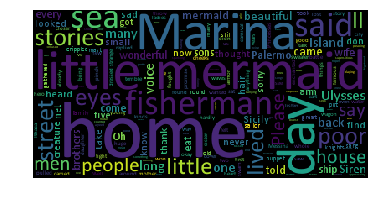

In [37]:
from os import path
#from scipy.misc import imread
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS

file = open("THE_LITTLE_MERMAID.txt",'r')
text = file.read()
file.close()
wordcloud = WordCloud(font_path='C:/Windows/Fonts/Calibri.ttf', relative_scaling = 0.25 ).generate(text)
plt.imshow(wordcloud)
plt.savefig('foo.png')
plt.axis("off")
plt.show()

In [23]:
import requests

data = requests.request(url="https://en.wikipedia.org/wiki/main_page",method='GET')
print(data.status_code)
result = str(data.content).find("Did you know")
print(result)

200
14898


In [12]:
def word_distribution(string):
    result={}
    for word in string.lower().split(' '):
        word = word.replace("(","")
        word = word.replace("!","")
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace("\"","")
        word = word.replace("“","")
        word = word.replace("?","")
        if word not in result:
            result[word] = 1
        else:
            result[word] += 1
    
    
    return result
word_distribution("That's when I saw Jane (John's sister)!")



{'i': 1,
 'jane': 1,
 "john's": 1,
 'saw': 1,
 'sister)': 1,
 "that's": 1,
 'when': 1}

In [13]:
word_distribution("Hello. How are you? Please say hello if you don’t love me!")

{'are': 1,
 'don’t': 1,
 'hello': 2,
 'how': 1,
 'if': 1,
 'love': 1,
 'me': 1,
 'please': 1,
 'say': 1,
 'you': 2}

In [2]:
numbers = [1, 2, 3, 4] 
numbers.append([5, 6, 7, 8])
print(len(numbers), numbers)

5 [1, 2, 3, 4, [5, 6, 7, 8]]


In [7]:
def replace(test_string, replace_string):
    position = test_string.find(replace_string)
    length = len(replace_string)
    print(test_string[:position]+ "bodega")
    
replace("Hi how are you?", "you")

Hi how are bodega


In [4]:
import pandas as pd
d = {'one' : pd.Series([100.,200.], index=['apple','orange']),
    'two' : pd.Series([111.,211], index=['apple','orange'])}
df = pd.DataFrame(d)
print(df)
filter = df['one']>100
filter.any()

          one    two
apple   100.0  111.0
orange  200.0  211.0


True

In [8]:
import re
regex = re.compile('.*\,(.*)\&.*')
print(regex.split("Feuer, Eis & Dosenbier"))

['', ' Eis ', '']


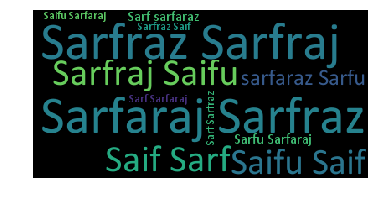

In [48]:
from os import path
#from scipy.misc import imread
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS

file = open("file.txt",'r')
text = file.read()
file.close()
wordcloud = WordCloud(font_path='C:/Windows/Fonts/Calibri.ttf',
                      relative_scaling = 0.20,
                      stopwords = 'Sarf'
                      ).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

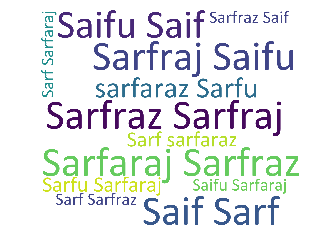

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Convert all the required text into a single string here 
#and store them in word_string

file = open("file.txt",'r')
word_string = file.read()
file.close()

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(font_path='C:/Windows/Fonts/Calibri.ttf',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000,
                          relative_scaling = 0.20,
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [1]:
 len("Hi there!")*2**3/4

18.0

# Send Unlimited messages using whatsapp

Sending message repetitively using whatsapp and python,Selenium.
This script require the scanning the QR code using your mobile for security provided by the whatsapp,just scan it and Enjoy!

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
 
#driver = webdriver.Firefox() 
 
driver = webdriver.Chrome(r"C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe")
driver.get("https://web.whatsapp.com/")
 
time.sleep(25)

newChat=driver.find_element_by_xpath('//*[@id="side"]/header/div[2]/div/span/div[1]/button').click()
find=driver.find_element_by_xpath('//input[@title="Search contacts"]')
find.send_keys('your contact name')
time.sleep(3)
elem = driver.find_element_by_xpath('//span[contains(text(),"your contact name")]')
elem.click()
time.sleep(5)
elem1 = driver.find_element_by_xpath('//div[@class="input"]')
i=1
while True:
    elem1.send_keys('paste you message here+ '+ str(i))
    i=i+1
    driver.find_element_by_class_name('send-container').click()